In [47]:
import pandas as pd

data = pd.read_csv("data.csv")

In [48]:
data['NO2_column_number_density'] = pd.cut(x=data['NO2_column_number_density'],labels=["Very Low", "Low", "Medium", "High", "Very High", "Extremely High"], bins=[0.000132911968750332, 0.00014057523586793585, 0.00014823850298553967, 0.00015590177010314348, 0.00016356503722074733, 0.00017122830433835117, 0.000178891571455955 ])

print(data.head())

# print(data.describe())

       bare     built     crops  flooded_vegetation     grass  \
0  0.127282  0.032651  0.055916            0.099583  0.034467   
1  0.141749  0.031184  0.055340            0.075958  0.041018   
2  0.167490  0.050443  0.059173            0.047932  0.053031   
3  0.157454  0.154849  0.073199            0.037329  0.064329   
4  0.097028  0.314384  0.057720            0.038571  0.063842   

   shrub_and_scrub  snow_and_ice     trees     water NO2_column_number_density  
0         0.120695      0.036952  0.417686  0.073687                    Medium  
1         0.149292      0.037370  0.400606  0.066341                    Medium  
2         0.153878      0.039719  0.356518  0.067201                    Medium  
3         0.164346      0.039082  0.235714  0.059866                    Medium  
4         0.143408      0.038529  0.165660  0.057771                    Medium  


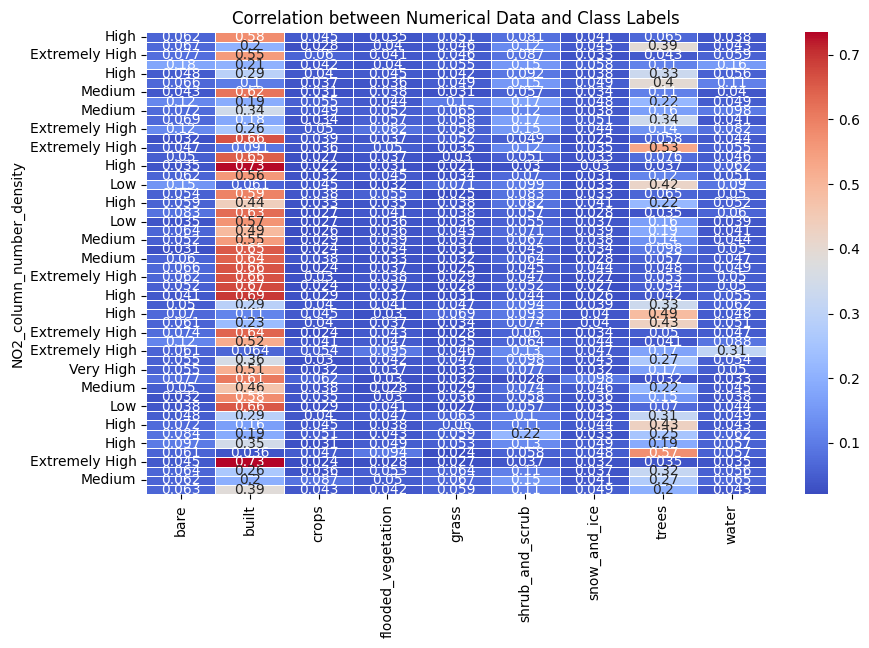

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sample = data.sample(n=50) 

sample.set_index('NO2_column_number_density', inplace=True)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sample, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation between Numerical Data and Class Labels')
plt.show()


In [59]:
# Assuming df is your DataFrame
X = data[data.columns.drop('NO2_column_number_density')]
y = data['NO2_column_number_density']


print(y)

0           Medium
1           Medium
2           Medium
3           Medium
4           Medium
           ...    
66993    Very High
66994    Very High
66995    Very High
66996    Very High
66997    Very High
Name: NO2_column_number_density, Length: 66998, dtype: category
Categories (6, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High' < 'Extremely High']


In [60]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree model
model = tree.DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

ValueError: Input contains NaN

In [4]:
# Assuming df is your DataFrame containing the data
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['NO2_column_number_density'].sort_values(ascending=False)

print(correlation_with_target)

NO2_column_number_density    1.000000
built                        0.289653
water                        0.057087
bare                         0.037311
flooded_vegetation           0.026172
snow_and_ice                 0.017999
crops                       -0.072235
grass                       -0.155456
shrub_and_scrub             -0.251411
trees                       -0.339175
Name: NO2_column_number_density, dtype: float64


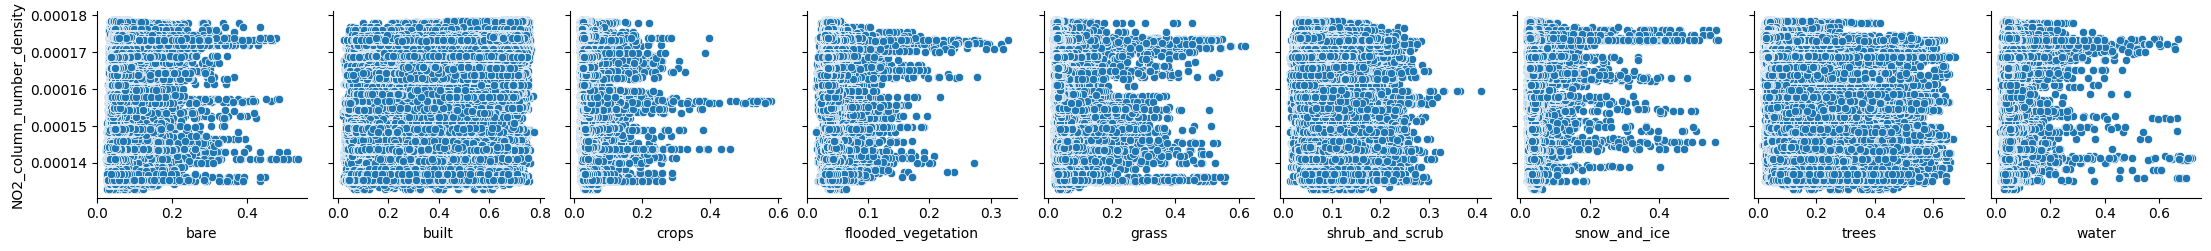

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
sns.pairplot(data, x_vars=['bare', 'built', 'crops', 'flooded_vegetation', 'grass', 'shrub_and_scrub', 'snow_and_ice', 'trees', 'water'], y_vars='NO2_column_number_density', kind='scatter')
plt.show()

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = data[data.columns.drop("NO2_column_number_density")]
y = data['NO2_column_number_density']

# Assuming X contains your features and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
predictions = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 7.546712262594961e-11


In [7]:
feature_importance = pd.Series(rf_regressor.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

trees                 0.283475
bare                  0.145089
grass                 0.113428
flooded_vegetation    0.089684
snow_and_ice          0.086621
crops                 0.079023
water                 0.072433
shrub_and_scrub       0.069244
built                 0.061004
dtype: float64


count     66974
unique        6
top         Low
freq      14960
Name: NO2_column_number_density, dtype: object
